In [561]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [562]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [563]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [564]:
(df.loc[:,:]==" ").sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [565]:
(df.loc[:,:]==0).sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [566]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [567]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [568]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [569]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [570]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [571]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [572]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [573]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [574]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [575]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [576]:
import statistics as stats
df["Gender"]=df["Gender"].fillna(stats.mode(df["Gender"]))
df["Married"]=df["Married"].fillna(stats.mode(df["Married"]))
df["Dependents"]=df['Dependents'].fillna(stats.mode(df["Dependents"]))
df["Self_Employed"]=df["Self_Employed"].fillna(stats.mode(df["Self_Employed"]))
df["LoanAmount"]=df["LoanAmount"].fillna(np.mean(df["LoanAmount"]))
df["Credit_History"]=df["Credit_History"].fillna(stats.mode(df["Credit_History"]))
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(stats.mode(df["Loan_Amount_Term"]))
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All nan values are filled.

# EDA

Text(0.5, 1.0, 'Gender')

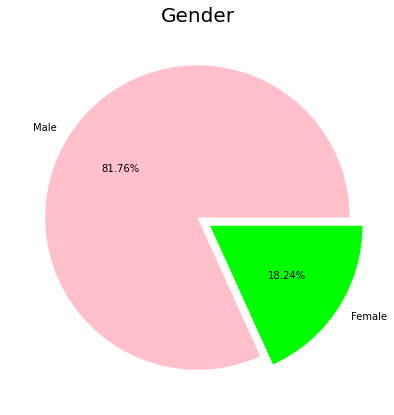

In [577]:
count=df["Gender"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["pink","lime"],autopct="%0.2f%%",explode=explode)
plt.title("Gender",size=20)

Observations:
    
1. Most male have applied for a loan than female.

Text(0.5, 1.0, 'Education')

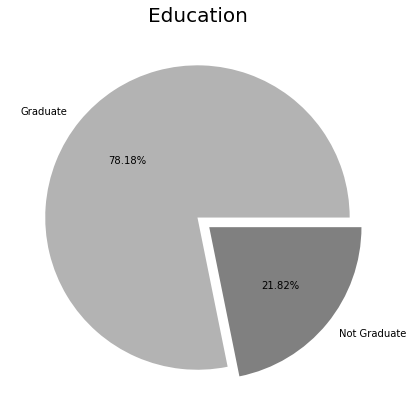

In [578]:
count=df["Education"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["0.7","0.5"],autopct="%0.2f%%",explode=explode)
plt.title("Education",size=20)

Observations:
    
Most individuals applying for a loan are graduates.

Text(0.5, 1.0, 'Married')

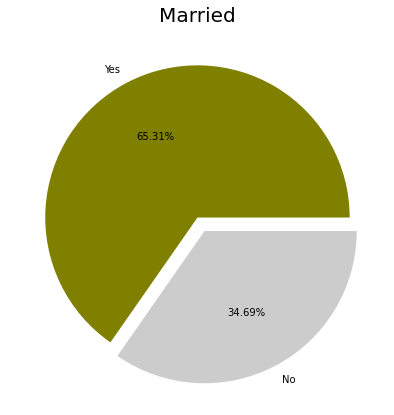

In [579]:
count=df["Married"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["olive","0.8"],autopct="%0.2f%%",explode=explode)
plt.title("Married",size=20)

Observation:
    
Most applicants are married.

Text(0.5, 1.0, 'Loan_Status')

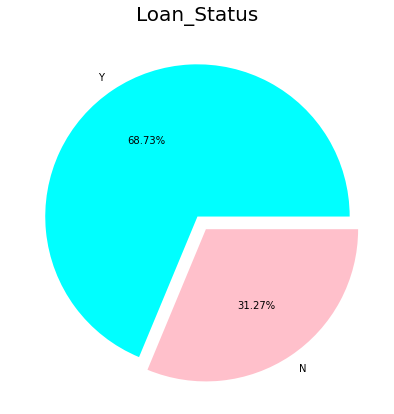

In [580]:
count=df["Loan_Status"].value_counts()
explode = [0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["cyan","pink"],autopct="%0.2f%%",explode=explode)
plt.title("Loan_Status",size=20)

Observation:
    
Most applicants had their loans approved.

Text(0.5, 1.0, 'Property_Area')

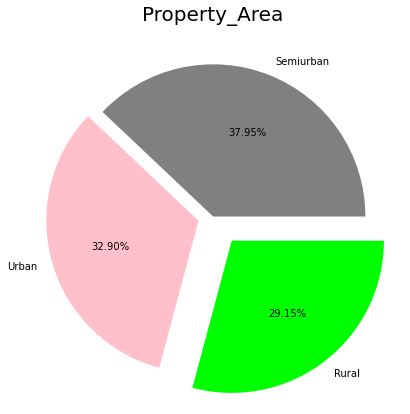

In [581]:
count=df["Property_Area"].value_counts()
explode = [0, 0.1,0.2]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["grey","pink","lime"],autopct="%0.2f%%",explode=explode)
plt.title("Property_Area",size=20)

Observations:
    
1. There higher number of semiurban applicants than urban or rural. 


2. Semiurban and rural account to close to 67% of the total applicants.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

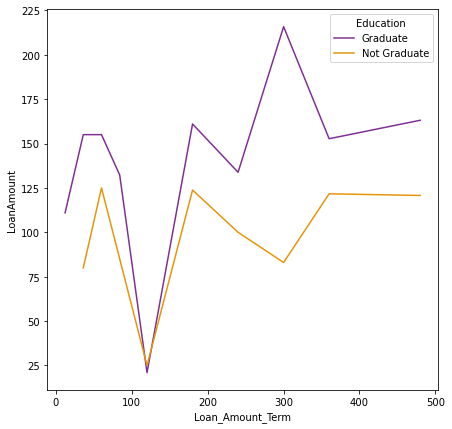

In [582]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Education",data=df,ci=None,palette ="CMRmap")

Observation:
    
1. Appplicants with graduation apply for a higher loan amount for the same tenure. 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

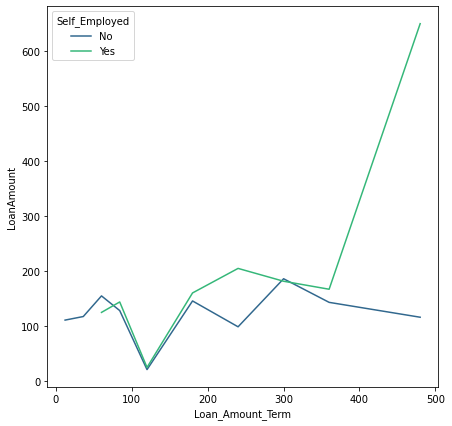

In [583]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Self_Employed",data=df,ci=None,palette ="viridis")

Observation:
    
Self employed applicants apply for a  higher  loan amounts for the same tenure.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

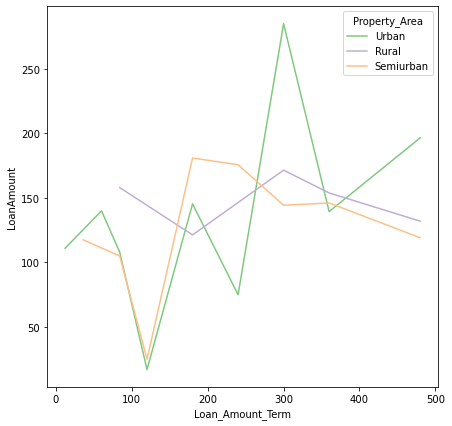

In [584]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Property_Area",data=df,ci=None,palette ="Accent")

Observation:
    
Applicants from urban apply for higher loan amount for the tenure when compare to semiurban. Likewise, semiurbans apply for higher loan amount than rural.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

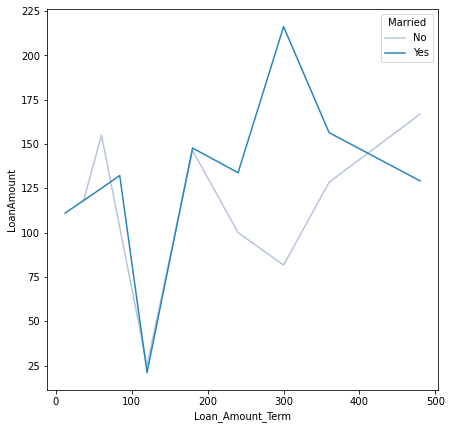

In [585]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Married",data=df,ci=None,palette ="PuBu")

Observation:
    
Most married applicants apply for higher loan amount than the ones not married.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

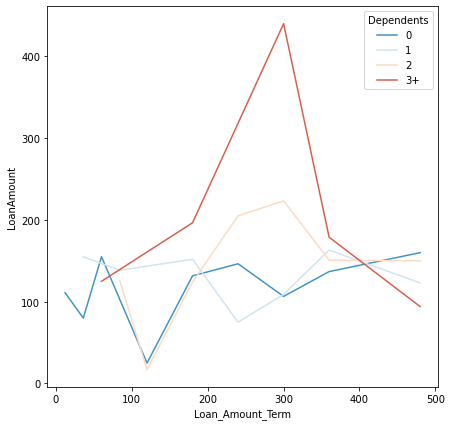

In [586]:
plt.figure(figsize=(7,7))

sns.lineplot(y="LoanAmount",x="Loan_Amount_Term",hue="Dependents",data=df,ci=None,palette ="RdBu_r")

Observation:
    
Most individuals with 3+ dependents apply for higher loan amount than 0,1 and 2 dependents.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

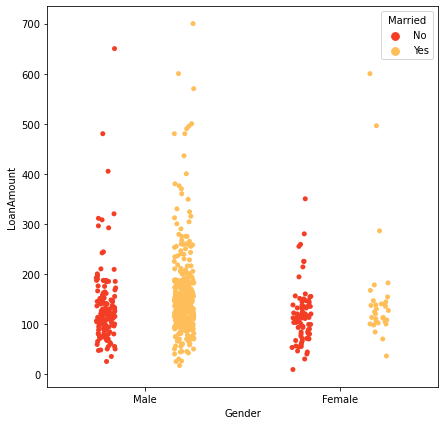

In [587]:
plt.figure(figsize=(7,7))

sns.stripplot(y="LoanAmount",data=df,x="Gender",palette="YlOrRd_r",hue="Married",dodge=True)

Observations:

    
1. Most male that are married apply for higher loan amount than the one that aren't.


2. Fewer number of women that are married apply for a loan amount higher than the one that aren't.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

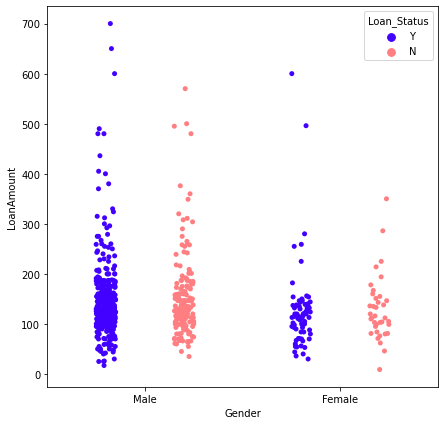

In [588]:
plt.figure(figsize=(7,7))

sns.stripplot(y="LoanAmount",data=df,x="Gender",palette="gnuplot2",hue="Loan_Status",dodge=True)

Observation:
    
1. Fewer number of women when compared to men faced rejection. This could also be because there were fewer female applicants. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

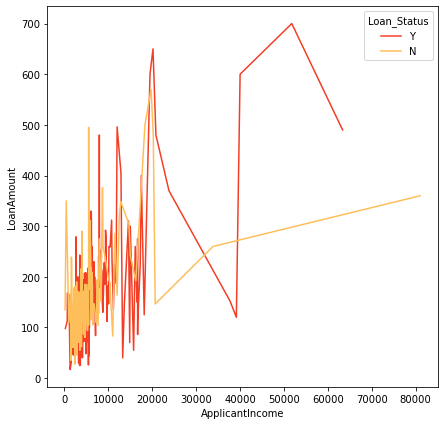

In [589]:
plt.figure(figsize=(7,7))

sns.lineplot(x="ApplicantIncome",y="LoanAmount",hue="Loan_Status",data=df,ci=None,palette ="YlOrRd_r")

Observations:
    
1. Applicants with lower income have chances to getting higher loan amounts approved.

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

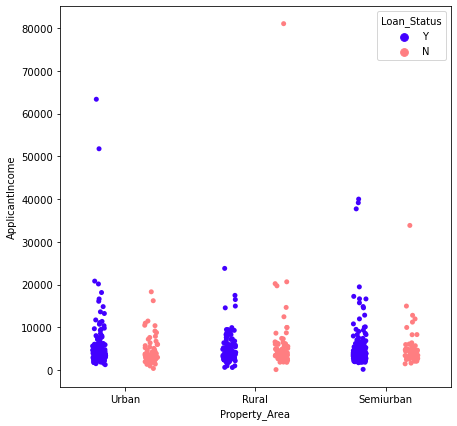

In [590]:
plt.figure(figsize=(7,7))

sns.stripplot(y="ApplicantIncome",data=df,x="Property_Area",palette="gnuplot2",hue="Loan_Status",dodge=True)

Observations:
    
1. Urban dwellers with higer income get their loans approved. 


2. A rural dweller even with high income faced  rejection.

Text(0.5, 1.0, 'Approved loans')

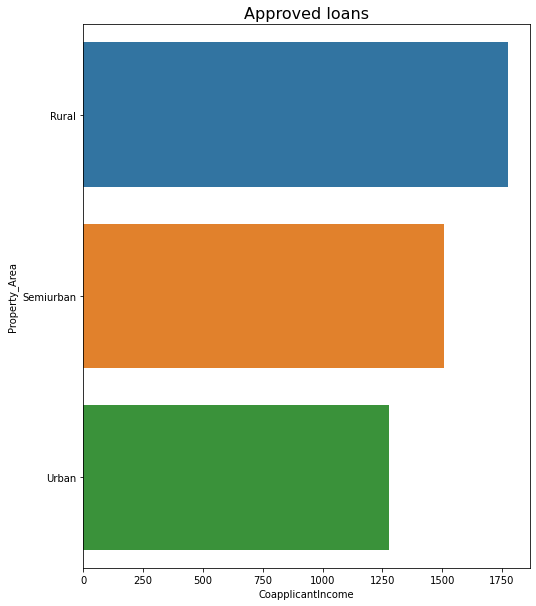

In [591]:
df_org = df.loc[df["Loan_Status"] == "Y"]
df_r = df_org.groupby(["Property_Area"])[["CoapplicantIncome"]].mean().sort_values(by = "CoapplicantIncome", ascending = False)
plt.figure(figsize = (8, 10))
sns.barplot(data = df_r, x = "CoapplicantIncome", y = df_r.index)
plt.title("Approved loans", size = 16)

Observations:
    
1. Highest number of rural applicants got their loans approved with higher coapplicant's income. 


2. least number of urban applicants got their loan approved with lower coapplicant's income. 

Text(0.5, 1.0, 'Rejected loans')

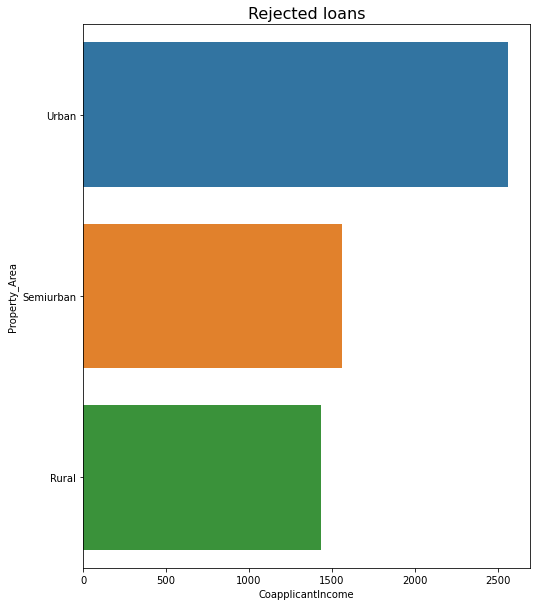

In [592]:
df_org = df.loc[df["Loan_Status"] == "N"]
df_r = df_org.groupby(["Property_Area"])[["CoapplicantIncome"]].mean().sort_values(by = "CoapplicantIncome", ascending = False)
plt.figure(figsize = (8, 10))
sns.barplot(data = df_r, x = "CoapplicantIncome", y = df_r.index)
plt.title("Rejected loans", size = 16)

Observations:
    
1. Higher number of urban applicants faced rejection with higher coapplicant's income.


2. Least number of rural applicants faced rejection with lower coapplicant's income.

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

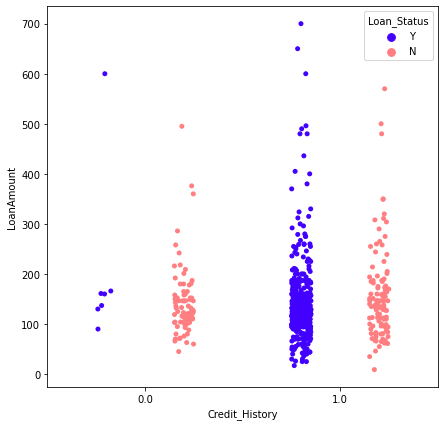

In [593]:
plt.figure(figsize=(7,7))

sns.stripplot(y="LoanAmount",data=df,x="Credit_History",palette="gnuplot2",hue="Loan_Status",dodge=True)

Observations:
    
1. barely any applicants with 0 credit history got their loan approved.


2. Most applicants with credit history got their loans approved even with higher loan amounts.

# Label encoding 

In [594]:
import sklearn 
from sklearn.preprocessing import LabelEncoder 
lencode=LabelEncoder()

In [595]:
df["Gender"]=lencode.fit_transform(df["Gender"])
df["Married"]=lencode.fit_transform(df["Married"])
df["Dependents"]=lencode.fit_transform(df["Dependents"])
df["Education"]=lencode.fit_transform(df["Education"])
df["Self_Employed"]=lencode.fit_transform(df["Self_Employed"])
df["Property_Area"]=lencode.fit_transform(df["Property_Area"])
df["Loan_Status"]=lencode.fit_transform(df["Loan_Status"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [596]:
df=df.drop(["Loan_ID"],axis=1)  #all unique values

In [597]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [598]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

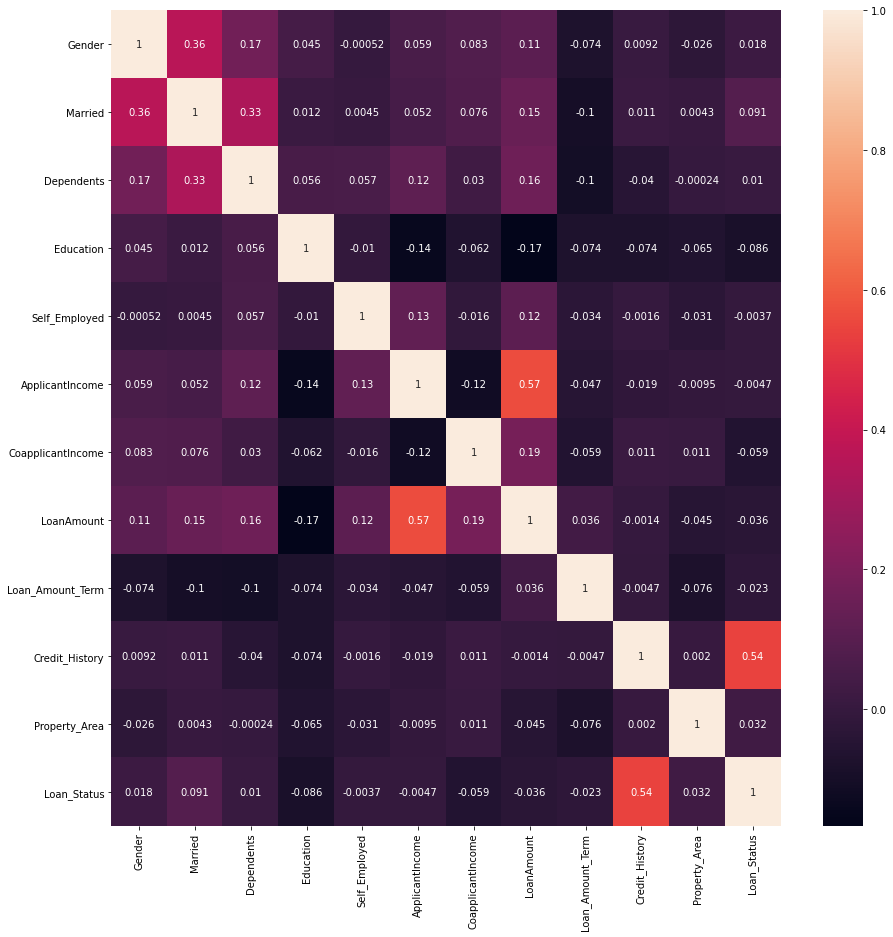

In [599]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

Observations:
    
1. Applicants income and self employed have correlation with loan status close to zero.


2. Credit history has the highest correlation with loan status.

In [600]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observations:
    
1. Applicant's income, coapplicant's income and loan amount are not normally distributed. 

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


Observation:
    
1. No null values present.

# Checking for outliers and skewness

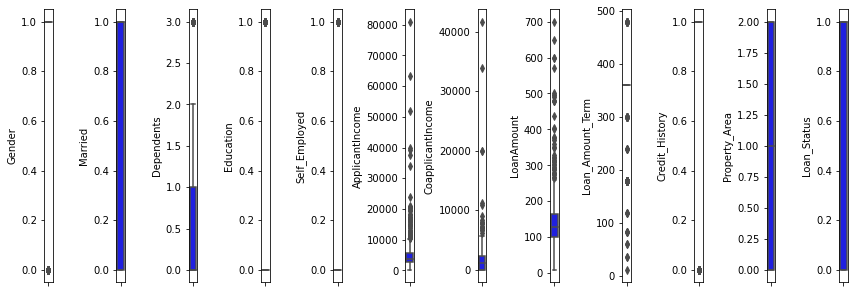

In [602]:
collist=df.columns.values
ncol=20 #no.of columns and rows to display the graphs i.e max col and max row
nrows=15
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="blue",orient="v")
    plt.tight_layout()

Observations:
    
1. applicant income, coapplicant income and loan amount have outliers.

In [603]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observations:
    
1. applicant income, coapplicant income and loan amount have skewness.

# Data Cleaning

In [604]:
df=df.drop(["ApplicantIncome","Self_Employed"],axis=1)  #correlation is almost equal to zero with the target.

In [605]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [606]:
c_vif(x)

,variables,VIF
0,Gender,5.988964
1,Married,3.647723
2,Dependents,1.784934
3,Education,1.300372
4,CoapplicantIncome,1.364966
5,LoanAmount,4.355778
6,Loan_Amount_Term,10.271447
7,Credit_History,6.053629
8,Property_Area,2.569593


In [607]:
#df["diff"]=(df["LoanAmount"]-df["Loan_Amount_Term"])**2
#df

In [608]:
df=df.drop(["Loan_Amount_Term"],axis=1)

In [609]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]
c_vif(x)

,variables,VIF
0,Gender,5.422472
1,Married,3.641869
2,Dependents,1.782952
3,Education,1.267209
4,CoapplicantIncome,1.364293
5,LoanAmount,3.788859
6,Credit_History,4.426794
7,Property_Area,2.397412


In [610]:
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df))  #removes outliers
z.shape

(614, 9)

In [611]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 9)
(594, 9)


In [612]:
#data loss 
(614-594)/614*100

3.257328990228013

Since the data loss is less than 10% we can proceed.

In [613]:
x=df_new.drop(["Loan_Status"],axis=1)
y=df_new["Loan_Status"]

In [614]:
print(x.shape)
print(y.shape)

(594, 8)
(594,)


In [615]:
from sklearn.preprocessing import power_transform 
x=power_transform(x,method="yeo-johnson") #removing skewness 

# Preprocessing 

In [616]:
import sklearn 
from sklearn.preprocessing import MinMaxScaler 

In [617]:
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[1.        , 0.        , 0.        , ..., 0.59821418, 1.        ,
        1.        ],
       [1.        , 1.        , 0.72187366, ..., 0.5523369 , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.35745931, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.72187366, ..., 0.81089402, 1.        ,
        1.        ],
       [1.        , 1.        , 0.91534128, ..., 0.68796063, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.56518067, 0.        ,
        0.53404371]])

# SMOTE

In [618]:
y.value_counts()

1    410
0    184
Name: Loan_Status, dtype: int64

In [619]:
from imblearn.over_sampling import SMOTE 
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [620]:
trainy.value_counts()

1    410
0    410
Name: Loan_Status, dtype: int64

# Logistic Regression

In [621]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [622]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    
    pred_test_lr=lr.predict(x_test)
    
    print("At random state=",i,'testing accuracy =',accuracy_score(y_test,pred_test_lr))
    print("\n")

At random state= 0 testing accuracy = 0.7317073170731707


At random state= 1 testing accuracy = 0.75


At random state= 2 testing accuracy = 0.6707317073170732


At random state= 3 testing accuracy = 0.7134146341463414


At random state= 4 testing accuracy = 0.7012195121951219


At random state= 5 testing accuracy = 0.6829268292682927


At random state= 6 testing accuracy = 0.6463414634146342


At random state= 7 testing accuracy = 0.6829268292682927


At random state= 8 testing accuracy = 0.6463414634146342


At random state= 9 testing accuracy = 0.75


At random state= 10 testing accuracy = 0.6951219512195121


At random state= 11 testing accuracy = 0.7317073170731707


At random state= 12 testing accuracy = 0.6829268292682927


At random state= 13 testing accuracy = 0.7439024390243902


At random state= 14 testing accuracy = 0.676829268292683


At random state= 15 testing accuracy = 0.7195121951219512


At random state= 16 testing accuracy = 0.7073170731707317


At random state= 17

In [641]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=5)
lr.fit(x_train,y_train)
    
pred_test_lr=lr.predict(x_test)
    
print('testing accuracy =',accuracy_score(y_test,pred_test_lr))

testing accuracy = 0.6829268292682927


In [642]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(lr,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 70.48780487804878 at cv = 2
Score = 71.09792073295723 at cv = 3
Score = 71.09756097560975 at cv = 4
Score = 70.48780487804878 at cv = 5
Score = 70.3637111779018 at cv = 6
Score = 70.48902133647897 at cv = 7
Score = 71.2164477441462 at cv = 8
Score = 70.12130381695599 at cv = 9
Score = 70.60975609756098 at cv = 10


In [643]:
rf_cv=cross_val_score(lr,trainx,trainy,cv=7)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test,pred_test_lr))

CV Score = 70.48902133647897
Accuracy_score = 0.6829268292682927


In [623]:
 x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2)

# DecisionTree Classifier

In [624]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [636]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

pred_test_dt=dt.predict(x_test)
acc_test=accuracy_score(pred_test_dt,y_test)

print("acc_test =",acc_test)

acc_test = 0.774390243902439


In [637]:
for i in range(2,11):
    rf_cv=cross_val_score(dt,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 70.97560975609755 at cv = 2
Score = 73.66469702236125 at cv = 3
Score = 73.90243902439025 at cv = 4
Score = 74.99999999999999 at cv = 5
Score = 73.661800486618 at cv = 6
Score = 74.88772997247573 at cv = 7
Score = 73.42351989339426 at cv = 8
Score = 75.73923660880183 at cv = 9
Score = 73.17073170731707 at cv = 10


In [638]:
rf_cv=cross_val_score(dt,trainx,trainy,cv=7)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_dt,y_test)*100)

CV Score = 74.39932948407524
Accuracy_score = 77.4390243902439


# RandomForest Classifier

In [654]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test)

acc_test = 0.7804878048780488


In [630]:
for i in range(2,11):
    rf_cv=cross_val_score(rf,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 77.3170731707317 at cv = 2
Score = 77.44133401067708 at cv = 3
Score = 78.17073170731707 at cv = 4
Score = 79.02439024390245 at cv = 5
Score = 79.64344496922855 at cv = 6
Score = 79.76345688210095 at cv = 7
Score = 79.41295450218922 at cv = 8
Score = 80.49317831926528 at cv = 9
Score = 80.0 at cv = 10


In [655]:
rf_cv=cross_val_score(rf,trainx,trainy,cv=4)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test)*100)

CV Score = 78.53658536585367
Accuracy_score = 78.04878048780488


# SVC

In [657]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.7317073170731707

In [658]:
for i in range(2,11):
    rf_cv=cross_val_score(svc,trainx,trainy,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 71.34146341463415 at cv = 2
Score = 71.22091209682452 at cv = 3
Score = 72.07317073170731 at cv = 4
Score = 73.04878048780488 at cv = 5
Score = 71.46575783598111 at cv = 6
Score = 72.31638418079098 at cv = 7
Score = 72.19802969731582 at cv = 8
Score = 71.09810479375697 at cv = 9
Score = 71.82926829268293 at cv = 10


In [659]:
rf_cv=cross_val_score(svc,trainx,trainy,cv=8)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test,y_pred_svc)*100)

CV Score = 72.19802969731582
Accuracy_score = 73.17073170731707


# Hyper parameter tuning

In [660]:
from sklearn.model_selection import GridSearchCV
param = {"criterion":["gini","entropy"],"max_features":["auto","sqrt","log2"],"bootstrap":[True,False],"n_estimators":[50,100,150,200]}
clf = GridSearchCV(RandomForestClassifier(),param_grid=param)

In [661]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [662]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}
0.8109299097848716


In [664]:
rf=RandomForestClassifier(bootstrap=True,criterion="gini",max_features="auto",n_estimators=200)
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test*100)

acc_test = 77.4390243902439


In [665]:
rf_cv=cross_val_score(rf,trainx,trainy,cv=4)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test)*100)

CV Score = 78.53658536585367
Accuracy_score = 77.4390243902439


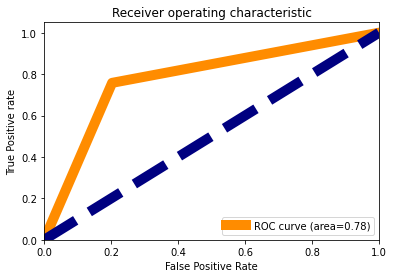

In [666]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The best fit model is this having accuracy score=77.4 , CV score=78.5 and ROC=78

# Model saving

In [667]:
import pickle 
filename= "Loan.pkl"
pickle.dump(rf, open(filename,"wb"))

# Conclusion 

In [669]:
a=np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
159,0,0
160,0,0
161,1,1
162,0,0
